In [1]:
import pandas as pd
import numpy as np

In [27]:
data_folder = 'data/'
data = pd.read_csv(
    'en.openfoodfacts.org.products.csv', sep='\t')

/Users/Crespo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Preprocessing

### Chosen Fields

(at least some text that explains why we dropped the other fields)

In [28]:
data.columns[100:]

Index(['-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g', '-lactose_100g', '-maltose_100g',
       '-maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'proteins_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
       'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g',
       'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g',
       'iron_100g', 'magnesium_100g', 'zinc_100g', 'copper_100g',
       'manganese_100g

In [29]:
chosen_fields = ['product_name', 'packaging_tags', 'brands_tags', 'carbon-footprint_100g',
                 'origins_tags', 'manufacturing_places_tags', 'labels_en', 'stores', 'countries_en',
                 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 
                 'nutrition_grade_fr', 'pnns_groups_1', 'fruits-vegetables-nuts_100g',
                 'main_category_en', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 
                 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 
                 'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g', 'trans-fat_100g', 
                 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 
                 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']

data = data[chosen_fields]

## Field Cleaning

The 'pnns_groups_1' field is particularly usefull in our study. 
Indeed, it sorts the different food entries by some clear category, as seen below.

In [30]:
data['pnns_groups_1'].value_counts()

unknown                    122802
Sugary snacks               29975
Milk and dairy products     17932
Composite foods             14659
Cereals and potatoes        14575
Fish Meat Eggs              13970
Beverages                   12410
Fat and sauces              11400
Fruits and vegetables       11086
Salty snacks                 5591
fruits-and-vegetables        1537
sugary-snacks                1450
cereals-and-potatoes           25
salty-snacks                    3
Name: pnns_groups_1, dtype: int64

A simple map allows for better organisation and also cleans the duplicate field entries:

In [31]:
my_map = {'unknown' : 'Unknown',
 'Sugary snacks' : 'Snacks', 
 'Milk and dairy products' : 'Fish Meat Eggs Dairy',
 'Composite foods' : 'Composite', 
 'Cereals and potatoes' : 'Starchy', 
 'Fish Meat Eggs' : 'Fish Meat Eggs Dairy',
 'Beverages' : 'Beverages',
 'Fat and sauces' : 'Fat Sauces',
 'Fruits and vegetables' : 'Fruits Vegetables',
 'Salty snacks' : 'Snacks',
 'fruits-and-vegetables' : 'Fruits Vegetables',
 'sugary-snacks' : 'Snacks',
 'cereals-and-potatoes' : 'Starchy',
 'salty-snacks' : 'Snacks'
}

data['pnns_groups_1'].replace(my_map, inplace=True)

Now the categories are clear:

In [32]:
data['pnns_groups_1'].value_counts()

Unknown                 122802
Snacks                   37019
Fish Meat Eggs Dairy     31902
Composite                14659
Starchy                  14600
Fruits Vegetables        12623
Beverages                12410
Fat Sauces               11400
Name: pnns_groups_1, dtype: int64

From the 'main_category_en' field, we can recover more entries for the previous categories, as well as a new meaningfull category 'Plant-based foods and beverages', that we will rename 'Veggie' and add it as a new binary field in the data set.

In [33]:
data['main_category_en'].value_counts().head(20)

Plant-based foods and beverages    38490
Beverages                          26082
Sugary snacks                      25179
Dairies                            16129
Meats                               9783
Groceries                           9674
Meals                               8338
Spreads                             4624
Frozen foods                        3152
Fruit juices                        3108
Desserts                            3076
Salty snacks                        3005
Seafood                             2919
Canned foods                        2766
Fats                                1878
Baby foods                          1036
Sweeteners                           944
Sandwiches                           905
Farming products                     796
Fish and meat and eggs               740
Name: main_category_en, dtype: int64

First the usefull categories of `pnns_groups_1` and `main_category_en` are merged.
This merged categorical field is called `category`.

In [34]:
my_map_2 = {
    'Beverages' : 'Beverages',
    'Sugary snacks' : 'Snacks',
    'Dairies' : 'Fish Meat Eggs Dairy',
    'Meats' : 'Fish Meat Eggs Dairy',
    'Meals' : 'Composite',
    'Fruit juices' : 'Beverages',
    'Salty snacks' : 'Snacks',
    'Fats' : 'Fat Sauces',
    'Fish and meat and eggs' : 'Fish Meat Eggs Dairy'
}

In [35]:
not_in_pnns = data[data['pnns_groups_1'].isna()]
keys = my_map_2.keys()
not_in_pnns.query('main_category_en in @keys')['main_category_en'].value_counts()

Beverages                 5842
Meats                       68
Meals                       16
Fish and meat and eggs      12
Name: main_category_en, dtype: int64

We see that the number of usefull entries that are not already present in `pnns_group_1` are mainly from the `Beverages` category. Nonetheless, we build the new `Category` field as previously exposed, and add these categories, as well as the `pnns_group_1` fields.

In [36]:
# First add the values from 'pnns_groups_1'
data['Category'] = data['pnns_groups_1']
# Adds the values in 'main_category_en' that are not in 'pnns_groups_1' after applying the map
new_vals = not_in_pnns.query('main_category_en in @keys')['main_category_en'].replace(my_map_2)
data.loc[new_vals.index, 'Category'] = new_vals

Here is the new 'Category' field.

In [37]:
data['Category'].value_counts()

Unknown                 122802
Snacks                   37019
Fish Meat Eggs Dairy     31982
Beverages                18252
Composite                14675
Starchy                  14600
Fruits Vegetables        12623
Fat Sauces               11400
Name: Category, dtype: int64

Now the `Plant based food and beverages category` is used to create a new field called `Veggie`.

In [38]:
data['Veggie'] = data['main_category_en'] == 'Plant-based foods and beverages'

The veggie fields from `Category` are also added:

In [39]:
data['Veggie'] = np.logical_or(data['Veggie'], data['Category'] == 'Fruits Vegetables')
data['Veggie'] = np.logical_or(data['Veggie'], data['Category'] == 'Starchy')

In [40]:
data['Veggie'].value_counts()

False    657933
True      39891
Name: Veggie, dtype: int64

Notice that the `False` value doesn't mean that an entry is not veggie.

# Nutri-Score

The Nutri-Score system was developped after Article 14 of the Modernisation Law for the health system, dated 26 January 2016, required the french authorities to recommend a front-of-pack system of labelling that would be simple and accessible for all. 
The new system includes a colour coded scheme, ranging from green to orange, associated with letters from A to E. Productes designated with an 'A' have the best nutritional quality, while products designated with an E have poorer nutritional quality.

## Points A

| Points | Energy (kJ) | Fat (g) | Sugar (g) | Sodium (mg) |
|:------:|:-----------:|:-------:|:---------:|:-----------:|
|    0   |    <=335    |   <=1   |   <=4.5   |     <=90    |
|    1   |     >335    |    >1   |    >4.5   |     >90     |
|    2   |     >670    |    >2   |     >9    |     >180    |
|    3   |    >1005    |    >3   |   >13.5   |     >270    |
|    4   |    >1340    |    >4   |    >18    |     >360    |
|    5   |    >1675    |    >5   |   >22.5   |     >450    |
|    6   |    >2010    |    >6   |    >27    |     >540    |
|    7   |    >2345    |    >7   |    >31    |     >630    |
|    8   |    >2680    |    >8   |    >36    |     >720    |
|    9   |    >3015    |    >9   |    >40    |     >810    |
|   10   |    >3350    |   >10   |    >45    |     >900    |

## Points C

| Points | Fruits Vegetables Nuts (%) | Fiber (g) | Proteins (g) |
|:------:|:--------------------------:|:---------:|:------------:|
|    0   |            <=40            |   <=0.9   |     <=1.6    |
|    1   |             >40            |    >0.9   |     >1.6     |
|    2   |             >60            |    >1.9   |     >3.2     |
|    3   |              -             |    >2.8   |     >4.8     |
|    4   |              -             |    >3.7   |     >6.4     |
|    5   |             >80            |    >4.7   |     >8.0     |

## Nutri-Score Computation
  * If `points A` < 11, then `score` = `points A` - `points C`
  * If `points A` >= 11:
      * If `points(Fruits/Vegetables/Nuts)` = 5, then `score` = `points(A)` - `points(C)`
      * If `points(Fruits/Vegetables/Nuts)` < 5, then `score` = `points(A)` - (`points(Fiber)` + `points(Fruits/Vegetables/Nuts)`)

## Letters Thresholds
### Solid Food
  * A: until -1
  * B: from 0 to 2
  * C: from 3 to 10
  * D: from 11 to 18
  * E: 19 and more
  
### Beverages 
  * A: mineral and spring water
  * B: until 1
  * C: from 2 to 5
  * D: from 6 to 9
  * E: 10 and more

## Warning
When fiber content is not present, its eventual positive contribution is not taken into account.

Percentages corresponding to Fruits/Vegetables/Nuts are mainly missing from the packaging. 
It will be derived from other products as follows:
  * 100% : Fruit Juices
  * 90% : Fruit Compote
  * 85% : Vegetables
  * 50% : Jams
  
Tubers are not considered as vegetables for the nutri-score.

In [41]:
energy_bins = [data['energy_100g'].min(), 335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350, data['energy_100g'].max()]
data['energy_points'] = pd.cut(data['energy_100g'], energy_bins, labels=range(11)).astype(float)

fat_bins = [data['fat_100g'].min(), 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, data['fat_100g'].max()]
data['fat_points'] = pd.cut(data['fat_100g'], fat_bins, labels=range(11)).astype(float)

sugar_bins = [data['sugars_100g'].min(), 4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45, data['sugars_100g'].max()]
data['sugar_points'] = pd.cut(data['sugars_100g'], sugar_bins, labels=range(11)).astype(float)

sodium_bins = [data['sodium_100g'].min(), 90, 180, 270, 360, 450, 540, 630, 720, 810, 900, data['sodium_100g'].max()]
data['sodium_points'] = pd.cut(data['sodium_100g'], sodium_bins, labels=range(11)).astype(float)

data['points_A'] = data['energy_points'] + data['fat_points'] + data['sugar_points'] + data['sodium_points']

In [42]:
fvn_bins = [data['fruits-vegetables-nuts_100g'].min(), 40, 60, 80, data['fruits-vegetables-nuts_100g'].max()]
data['fvn_points'] = pd.cut(data['fruits-vegetables-nuts_100g'], fvn_bins, labels=[0,1,2,5]).astype(float)

fiber_bins = [data['fiber_100g'].min(), 0.9, 1.9, 2.8, 3.7, 4.7, data['fiber_100g'].max()]
data['fiber_points'] = pd.cut(data['fiber_100g'], fiber_bins, labels=range(6)).astype(float)
data['fiber_points'].fillna(0, inplace=True)

proteins_bins = [data['proteins_100g'].min(), 1.6, 3.2, 4.8, 6.4, 8.0, data['proteins_100g'].max()]
data['proteins_points'] = pd.cut(data['proteins_100g'], proteins_bins, labels=range(6)).astype(float)

data['points_C'] = data['fvn_points'] + data['fiber_points'] + data['proteins_points']

In [43]:
def compute_score(row):
    A = row['points_A']
    C = row['points_C']
    fvn = row['fvn_points']
    fiber = row['fiber_points']
    if A < 11 or fvn == 5:
        return A - C
    else:
        return A - (fiber + fvn)

In [44]:
data['score'] = data.apply(compute_score, axis=1)

In [45]:
a = (data['score'].max() - data['score'].min())

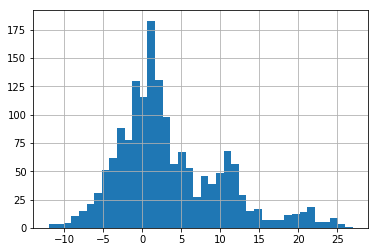

In [46]:
data['score'].hist(bins=int(data['score'].max() - data['score'].min() + 1))

**Carbon & Countries Analysis**

Countries Cleaning:

In [94]:
data['countries_en'].value_counts().head(20)

France                   422202
United States            173585
Switzerland               13463
Germany                   11866
France,Germany             6321
Spain                      6263
United Kingdom             5699
Belgium                    5447
France,Switzerland         4661
Belgium,France             3704
Canada                     3352
Mexico                     2435
Australia                  2418
Italy                      2225
Russia                     2111
France,United Kingdom      1984
France,Spain               1697
France,United States       1522
Sweden                     1294
Netherlands                1064
Name: countries_en, dtype: int64

**Carbon:**

In [56]:
data['carbon-footprint_100g'].value_counts().head()

0.0      82
345.0     4
150.0     4
365.0     4
153.0     4
Name: carbon-footprint_100g, dtype: int64

In [51]:
carbon_counts = data.loc[:,['Category', 'carbon-footprint_100g']]\
                .dropna()[data['carbon-footprint_100g']>0]
carbon_counts.groupby('Category').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head()

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,carbon-footprint_100g
Category,
Fish Meat Eggs Dairy,29408.7547
Snacks,29286.5500
Unknown,17085.3610
Starchy,7954.2100
Composite,4845.0000


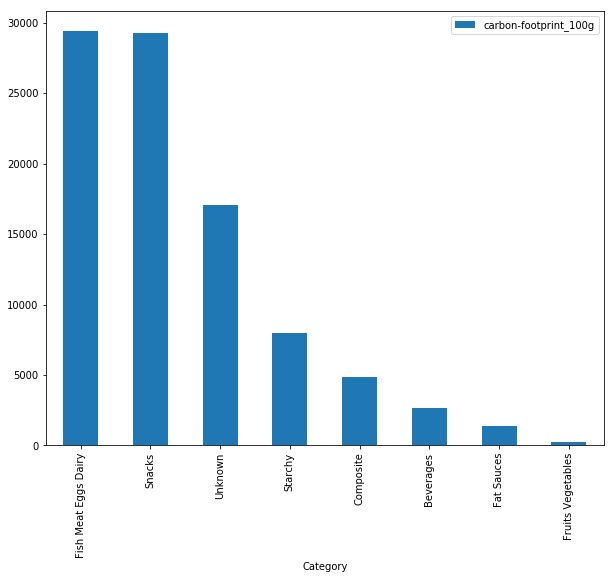

In [55]:
carbon_counts.groupby('Category').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).plot.bar(figsize = (10,8))

**Carbon Vs Nutricore !!**

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


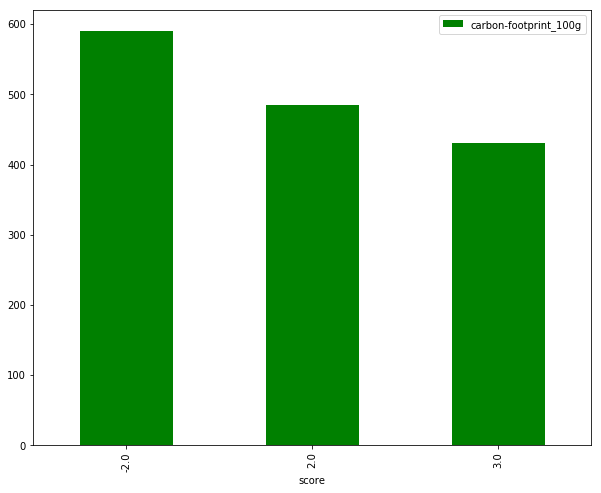

In [73]:
healthy_carbon = data.loc[:,['score', 'carbon-footprint_100g']]\
                .dropna()[data['carbon-footprint_100g']>0]
healthy_carbon.groupby('score').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head()

healthy_carbon.groupby('score').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).plot.bar(figsize = (10,8), color = 'green')

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


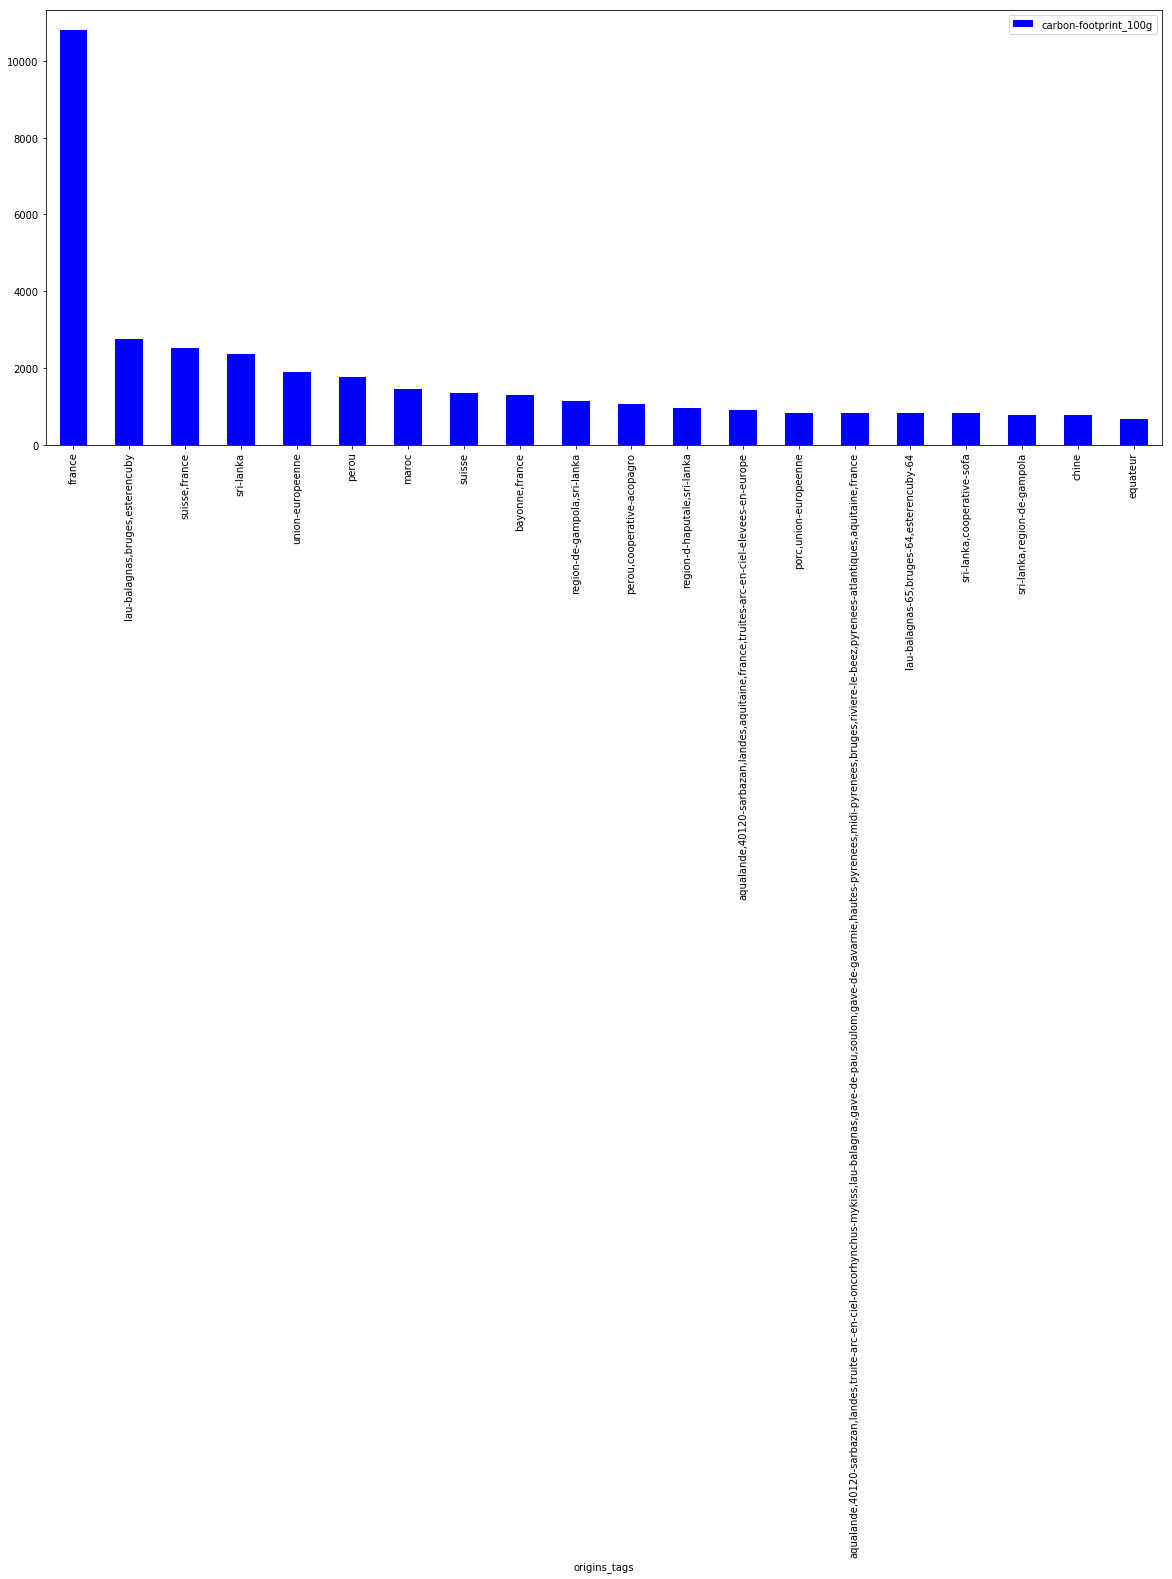

In [86]:
carbon_land = data.loc[:,['origins_tags', 'carbon-footprint_100g']].dropna()[data['carbon-footprint_100g']>0]
carbon_land = carbon_land.groupby('origins_tags').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head(20)

carbon_land.plot.bar(figsize = (20,8), color = 'blue')

**Palm-oil Brands:**

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


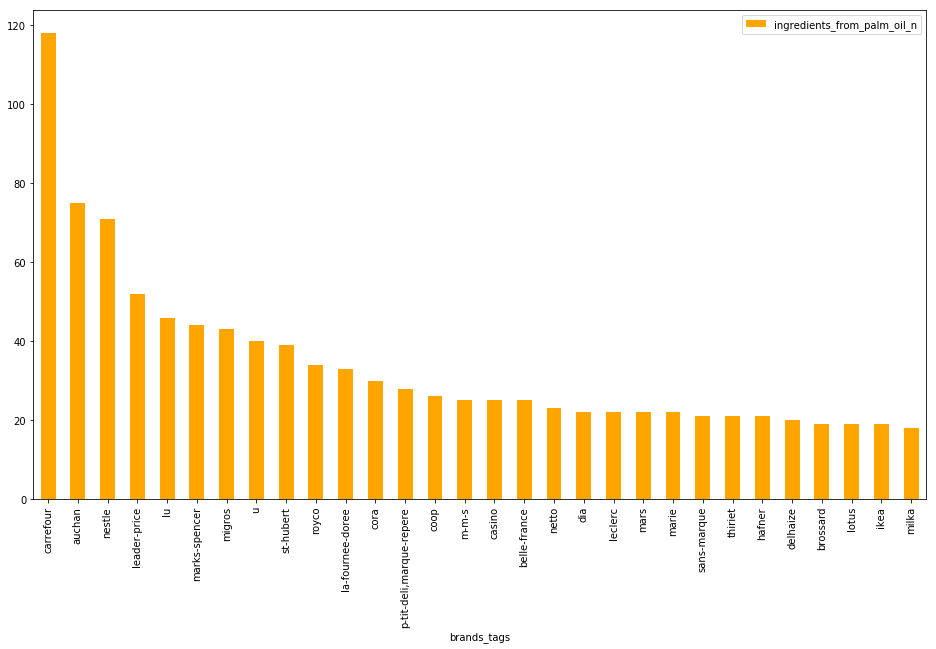

In [74]:
palmed_brand = data.loc[:,['brands_tags','ingredients_from_palm_oil_n']].dropna()[data.ingredients_that_may_be_from_palm_oil_n>0]

agg_palmed_brand = palmed_brand.groupby('brands_tags').sum().sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)

agg_palmed_brand = agg_palmed_brand.drop(agg_palmed_brand[agg_palmed_brand.index.str.contains(':')].index)

agg_palmed_brand.head(30).plot.bar(figsize = (16,9), color = 'orange')

**OOOh Nestle, you Dirty Bitch !!!**

**Controversial Countries & Brands: The countries and brands that may contains palm_oil**

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


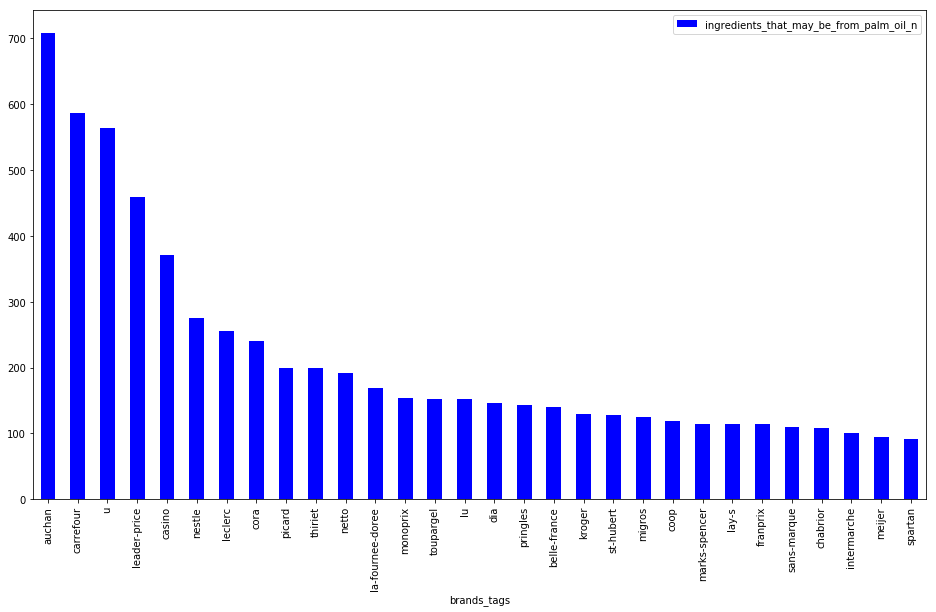

In [90]:
controversials_brands = data.loc[:,['brands_tags','ingredients_that_may_be_from_palm_oil_n']].dropna()[data.ingredients_that_may_be_from_palm_oil_n>0]

agg_controversials_brands = controversials_brands.groupby('brands_tags').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)

agg_controversials_brands = agg_controversials_brands.drop(agg_controversials_brands[agg_controversials_brands.index.str.contains(':')].index)

agg_controversials_brands.head(30).plot.bar(figsize = (16,9), color = 'blue')

OOUh Nestle, you're never far away...

/Users/Crespo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


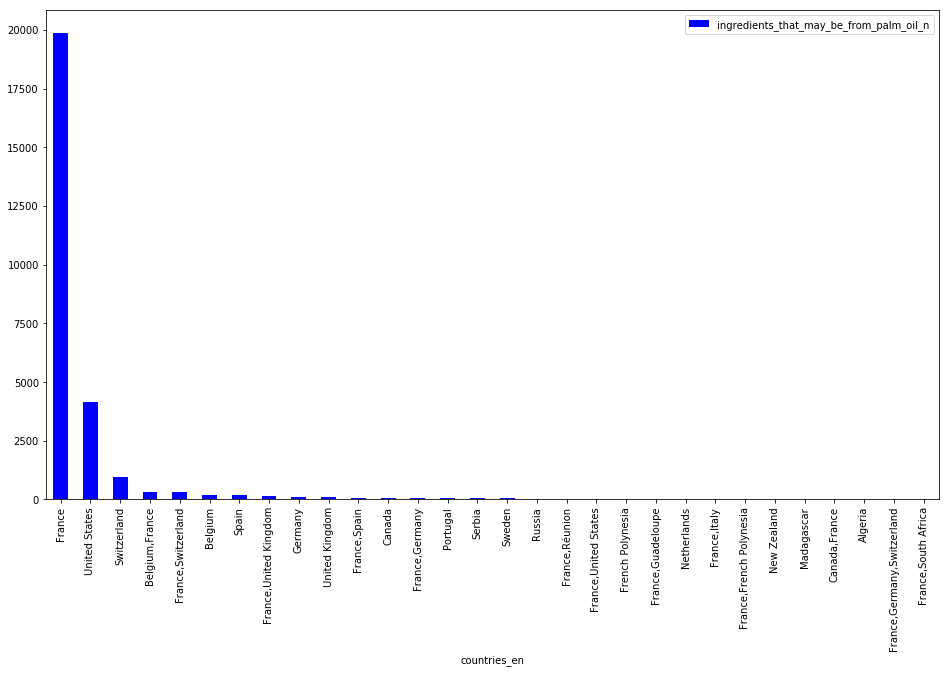

In [89]:
controv_countries = data.loc[:,['countries_en','ingredients_that_may_be_from_palm_oil_n']].dropna()[data.ingredients_that_may_be_from_palm_oil_n>0]

agg_controv_countries = controv_countries.groupby('countries_en').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)

agg_controv_countries = agg_controv_countries.drop(agg_controv_countries[agg_controv_countries.index.str.contains(':')].index)

agg_controv_countries.head(30).plot.bar(figsize = (16,9), color = 'blue')